In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importing the data set
dataset = pd.read_csv('ML-EdgeIIoT-dataset.csv', low_memory=False)

X = dataset.iloc[:, 3:-2].values #Selecting colomns from index 3 to the second last column as features
Y = dataset.iloc[:, -1].values #Selecting the last column as label



In [3]:
# 2. CONVERSION & INFINITY FIX (The crucial part)
# Convert to a DataFrame first to use powerful cleaning tools
X_df = pd.DataFrame(X)

# Convert all text to numbers, turning errors into 'NaN'
X_df = X_df.apply(pd.to_numeric, errors='coerce')

# Replace 'Infinity' or '-Infinity' with 'NaN'
X_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill all NaNs (and the infinities we just removed) with 0
X_df.fillna(0, inplace=True)

# This caps giant numbers at a safe limit for float32
X_df = X_df.clip(lower=-1e38, upper=1e38)

# Convert to float32 (the exact format the error is asking for)
X_clean = X_df.values.astype(np.float32)

# Convert back to a clean numpy array for the AI
X = X_df.values


In [4]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

# Turning names into numbers
le = LabelEncoder()
Y = le.fit_transform(Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# 1. Initialize and Train
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)

# 2. Predict and Evaluate
Y_pred_dt = dt_classifier.predict(X_test)



In [9]:
from sklearn.neighbors import KNeighborsClassifier

# we use 5 neighbors as a standard starting point
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, Y_train)

Y_pred_knn = knn_classifier.predict(X_test)


In [10]:

from xgboost import XGBClassifier

# Initialize and Train
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train, Y_train)

# Predict
Y_pred_xgb = xgb_classifier.predict(X_test)

c:\Users\USER\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [21:50:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [12]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import pandas as pd

# List to store our final results
comparison_data = []

# List of all models we have trained
all_models = [
    ('Random Forest', classifier),
    ('Decision Tree', dt_classifier),
    ('KNN', knn_classifier),
    ('XGBoost', xgb_classifier)
    
]

for name, model in all_models:
    # Get predictions
    Y_pred_current = model.predict(X_test)
    
    # Calculate Overall Accuracy
    acc = accuracy_score(Y_test, Y_pred_current)
    
    # Calculate Precision, Recall, and F1 (using 'weighted' average for multi-class)
    precision, recall, f1, _ = precision_recall_fscore_support(Y_test, Y_pred_current, average='weighted')
    
    # Append to our list
    comparison_data.append({
        'Algorithm': name,
        'Accuracy (%)': acc * 100,
        'Precision (%)': precision * 100,
        'Recall (%)': recall * 100,
        'F1-Score (%)': f1 * 100
    })

# Create the final comparison table
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(by='F1-Score (%)', ascending=False)

print("--- Final Model Comparative Analysis ---")
print(comparison_df.to_string(index=False))

ImportError: cannot import name 'accuracy_score_precision_recall_fscore_support' from 'sklearn.metrics' (c:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

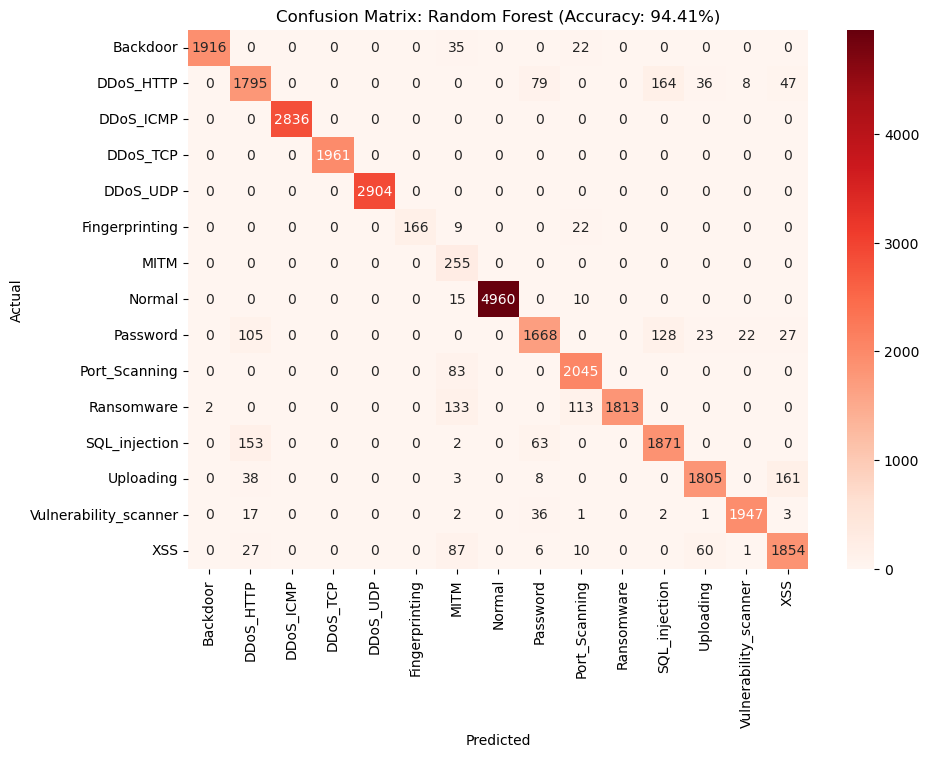

Random Forest analysis complete.
------------------------------


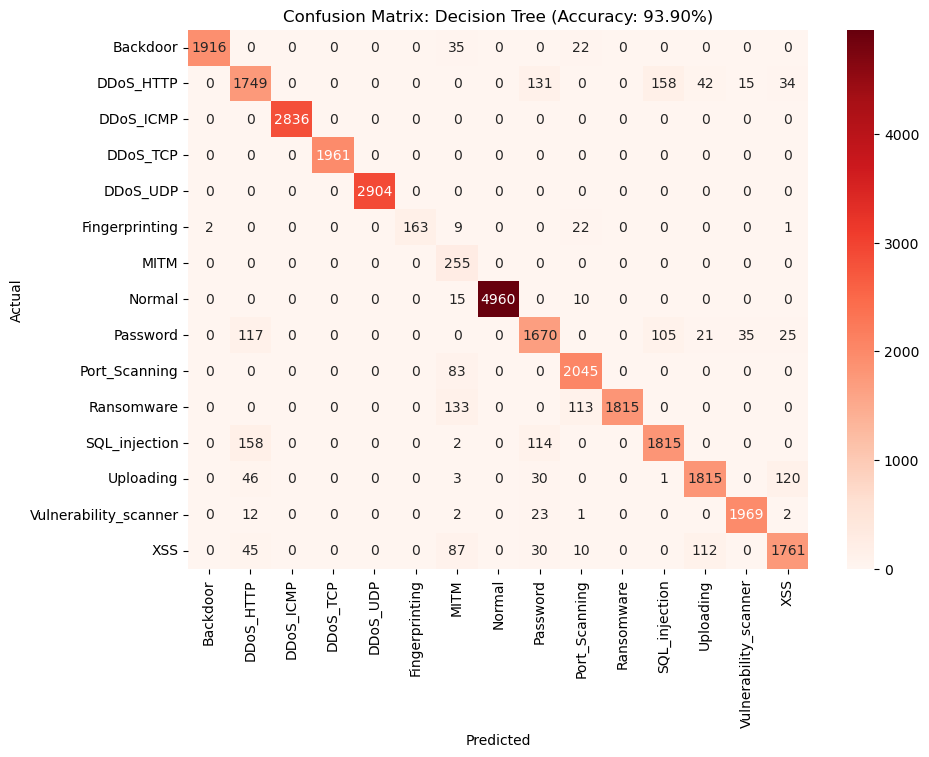

Decision Tree analysis complete.
------------------------------


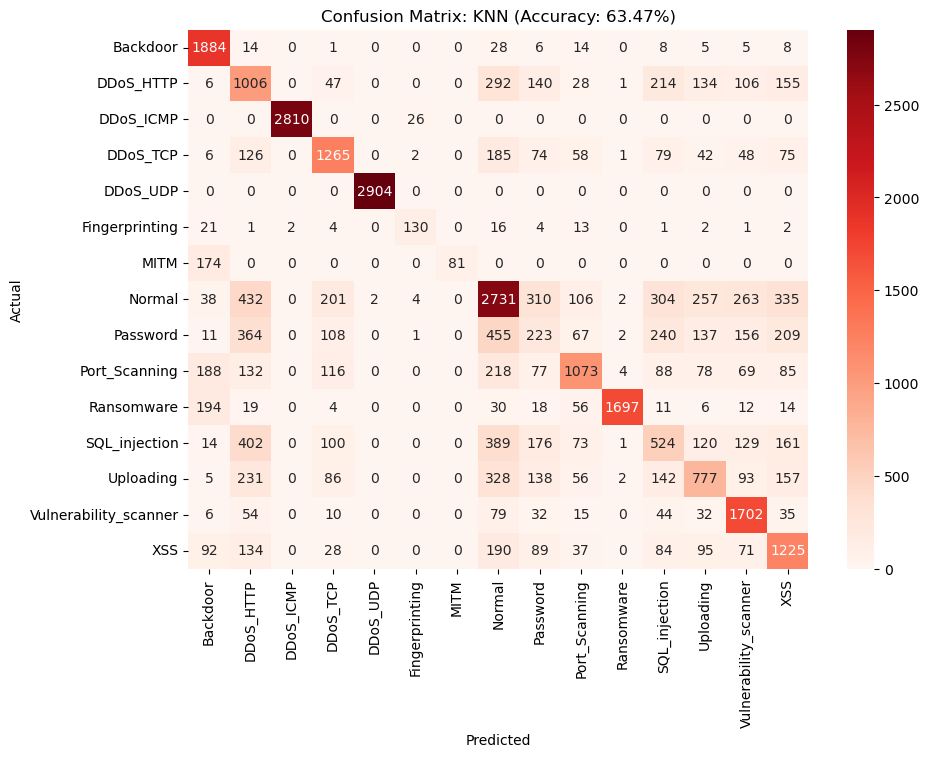

KNN analysis complete.
------------------------------


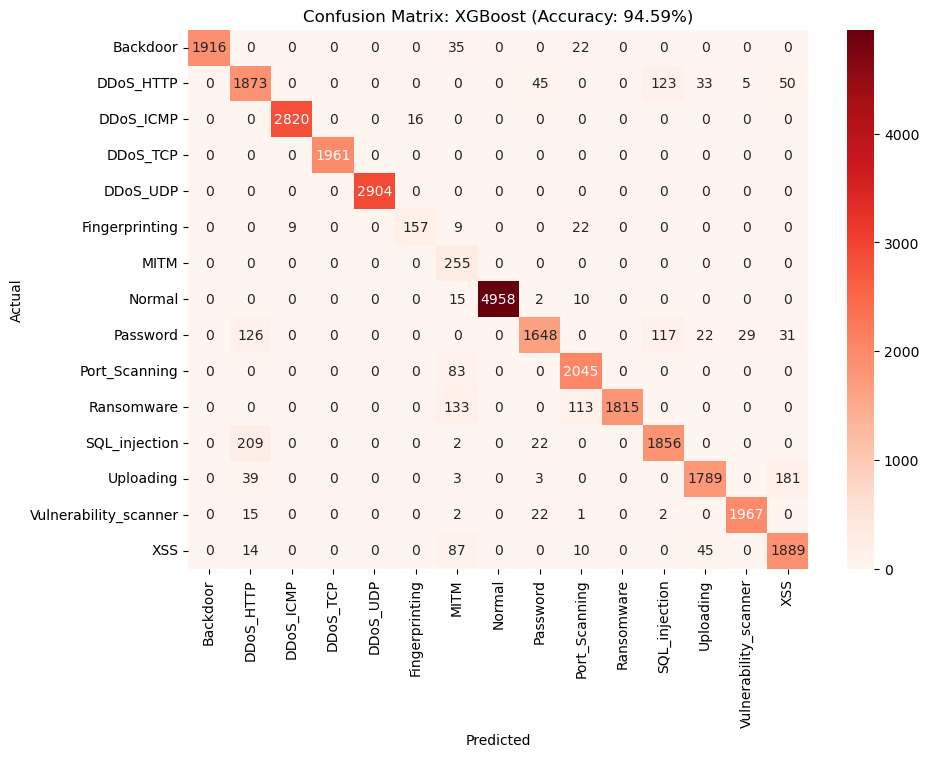

XGBoost analysis complete.
------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Define a list of our models
models = [
    ('Random Forest', classifier), 
    ('Decision Tree', dt_classifier),
    ('KNN', knn_classifier),
    ('XGBoost', xgb_classifier)
]

# 2. Loop through and plot
for name, model in models:
    # Get predictions
    Y_pred_current = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred_current)
    
    # Calculate Confusion Matrix
    cm = confusion_matrix(Y_test, Y_pred_current)
    
    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix: {name} (Accuracy: {acc*100:.2f}%)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print(f"{name} analysis complete.\n" + "-"*30)